In [ ]:
import csv
import gzip
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.optimize
import seaborn as sns
import string
from collections import defaultdict
from sklearn import linear_model
from sklearn import svm

In [ ]:
NBA_18_19 = pd.read_csv('NBA_PBP_2018-19.csv')
NBA_18_19.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,720,PHI,Jump ball: J. Embiid vs. A. Horford (B. Simmon...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Embiid - embiijo01,A. Horford - horfoal01,B. Simmons - simmobe01
1,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,R. Covington misses 3-pt jump shot from 27 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,675,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,673,PHI,Defensive rebound by D. ari,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NBA_18_19.describe()

,Quarter,SecLeft,AwayScore,HomeScore,ShotDist
count,614516.000000,614516.000000,614516.000000,614516.000000,233557.000000
mean,2.541338,332.016066,56.452450,58.003949,13.587270
std,1.141117,207.419566,33.120583,33.875884,10.564484
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,153.000000,28.000000,29.000000,2.000000
50%,3.000000,326.000000,56.000000,58.000000,13.000000
75%,4.000000,507.000000,84.000000,86.000000,25.000000
max,8.000000,720.000000,168.000000,161.000000,87.000000


In [ ]:
NBA_18_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614516 entries, 0 to 614515
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   URL                 614516 non-null  object 
 1   GameType            614516 non-null  object 
 2   Location            614516 non-null  object 
 3   Date                614516 non-null  object 
 4   Time                614516 non-null  object 
 5   WinningTeam         614516 non-null  object 
 6   Quarter             614516 non-null  int64  
 7   SecLeft             614516 non-null  int64  
 8   AwayTeam            614516 non-null  object 
 9   AwayPlay            310307 non-null  object 
 10  AwayScore           614516 non-null  int64  
 11  HomeTeam            614516 non-null  object 
 12  HomePlay            304204 non-null  object 
 13  HomeScore           614516 non-null  int64  
 14  Shooter             233557 non-null  object 
 15  ShotType            233557 non-nul

In [ ]:
NBA_18_19['GameType'].unique()

array(['regular', 'playoff'], dtype=object)

In [ ]:
NBA_18_19['Time'].unique()

array(['8:00 PM', '10:30 PM', '7:00 PM', '7:30 PM', '8:30 PM', '10:00 PM',
       '9:00 PM', '6:00 PM', '9:30 PM', '5:00 PM', '1:00 PM', '3:30 PM',
       '3:00 PM', '12:00 PM', '4:00 PM', '5:30 PM', '12:30 PM', '2:00 PM',
       '4:30 PM', '2:30 PM'], dtype=object)

In [ ]:
NBA_18_19['HomeTeam'].unique()

array(['BOS', 'GSW', 'CHO', 'DET', 'IND', 'ORL', 'NYK', 'TOR', 'HOU',
       'SAS', 'SAC', 'LAC', 'PHO', 'PHI', 'WAS', 'POR', 'BRK', 'MEM',
       'MIN', 'NOP', 'MIL', 'UTA', 'CHI', 'MIA', 'DAL', 'DEN', 'LAL',
       'CLE', 'OKC', 'ATL'], dtype=object)

In [ ]:
NBA_18_19['AwayTeam'].unique()

array(['PHI', 'OKC', 'MIL', 'BRK', 'MEM', 'MIA', 'ATL', 'CLE', 'NOP',
       'MIN', 'UTA', 'DEN', 'DAL', 'CHI', 'LAL', 'CHO', 'NYK', 'SAC',
       'BOS', 'IND', 'GSW', 'TOR', 'ORL', 'DET', 'PHO', 'SAS', 'HOU',
       'WAS', 'LAC', 'POR'], dtype=object)

In [ ]:
NBA_18_19.describe().round(2)

,Quarter,SecLeft,AwayScore,HomeScore,ShotDist
count,614516.00,614516.00,614516.00,614516.00,233557.00
mean,2.54,332.02,56.45,58.00,13.59
std,1.14,207.42,33.12,33.88,10.56
min,1.00,0.00,0.00,0.00,0.00
25%,2.00,153.00,28.00,29.00,2.00
50%,3.00,326.00,56.00,58.00,13.00
75%,4.00,507.00,84.00,86.00,25.00
max,8.00,720.00,168.00,161.00,87.00


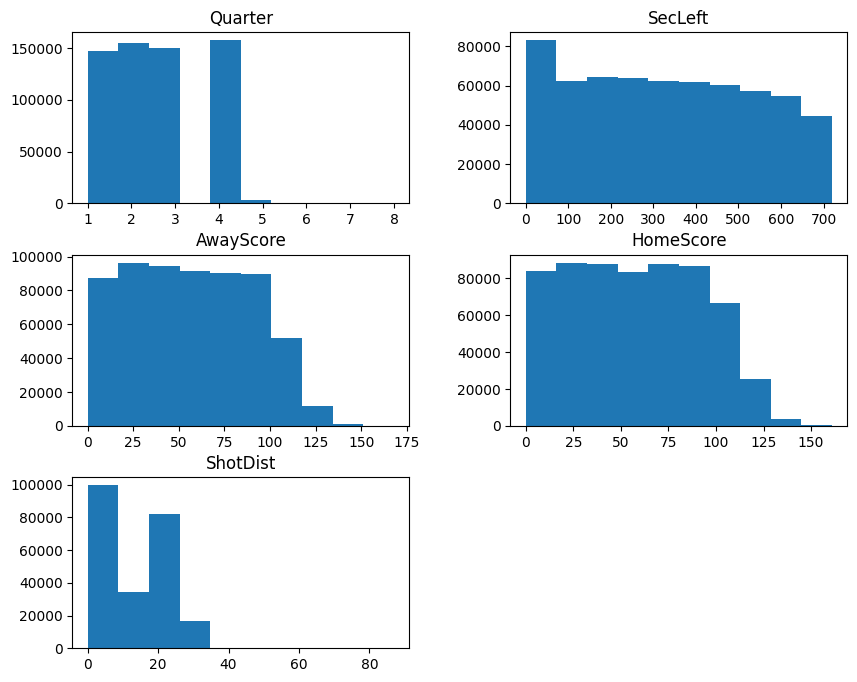

In [ ]:
NBA_18_19.hist(figsize=(10, 8), grid = False)
plt.show()

<Axes: ylabel='Count'>

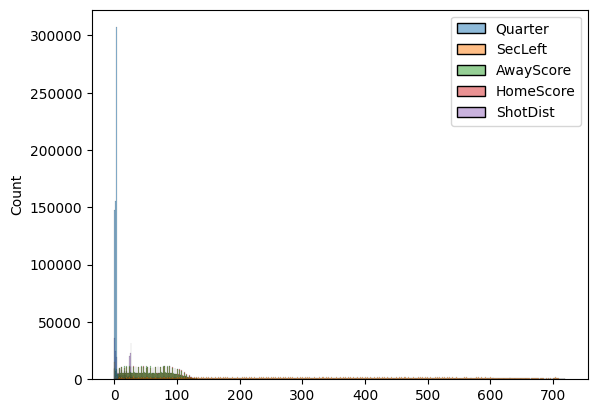

In [ ]:
sns.histplot(NBA_18_19)

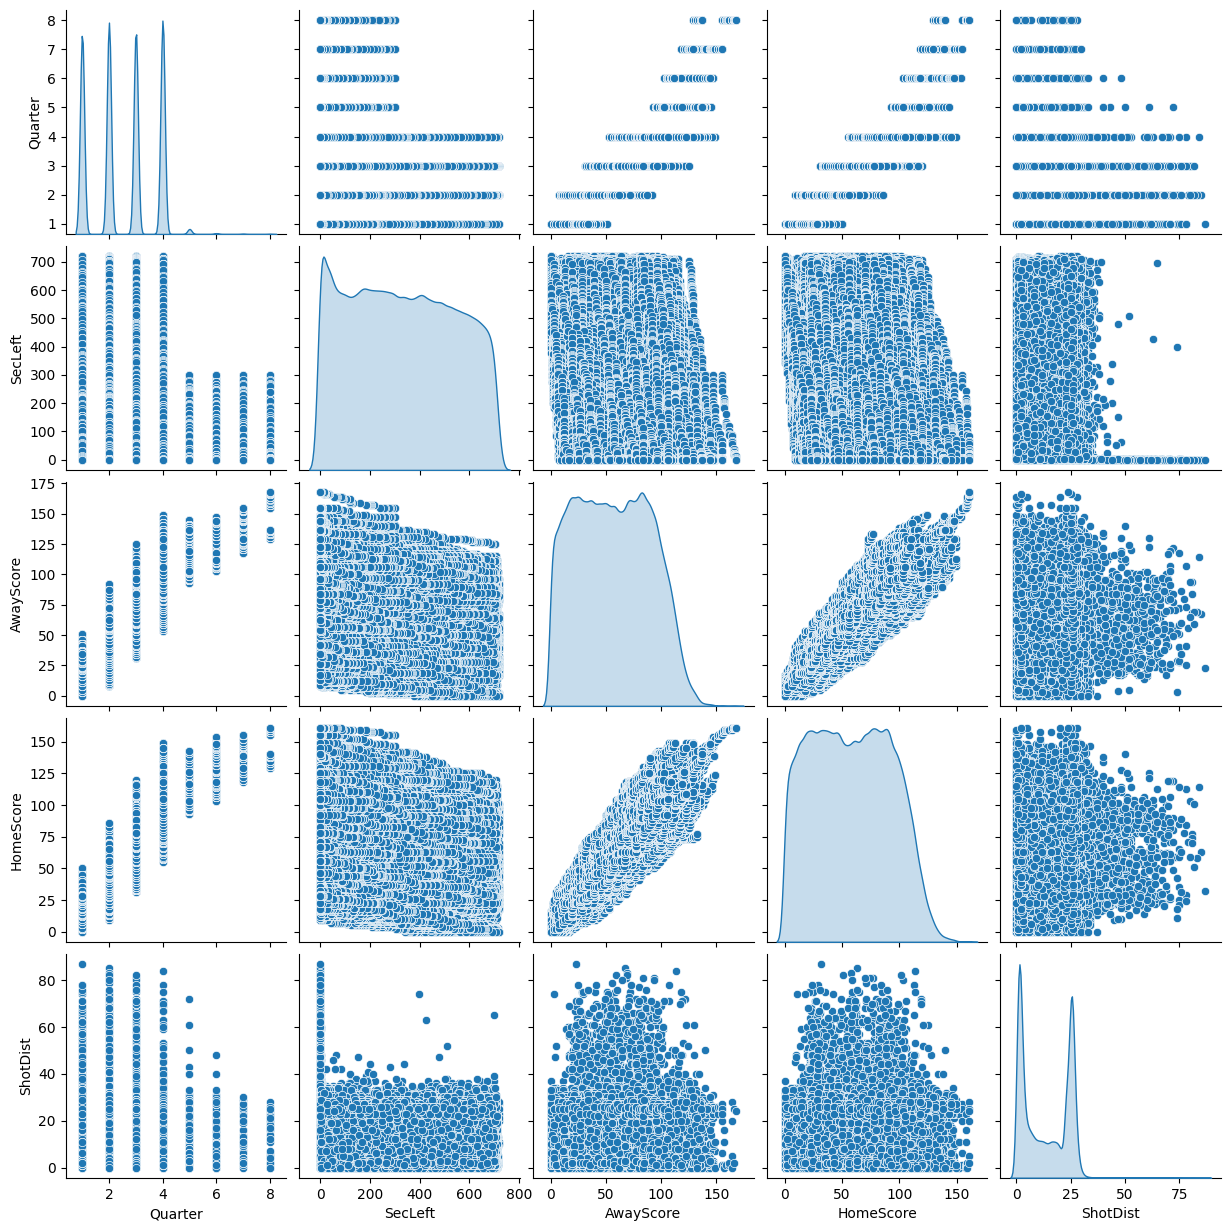

In [ ]:
sns.pairplot(NBA_18_19[['Quarter', 'SecLeft', 'AwayScore', 'HomeScore', 'ShotDist']], diag_kind='kde')

In [ ]:
corr = NBA_18_19[['Quarter', 'SecLeft', 'AwayScore', 'HomeScore', 'ShotDist']].corr()
corr

,Quarter,SecLeft,AwayScore,HomeScore,ShotDist
Quarter,1.000000,-0.030074,0.934856,0.935611,0.020252
SecLeft,-0.030074,1.000000,-0.263771,-0.262173,-0.036495
AwayScore,0.934856,-0.263771,1.000000,0.945265,0.027404
HomeScore,0.935611,-0.262173,0.945265,1.000000,0.028371
ShotDist,0.020252,-0.036495,0.027404,0.028371,1.000000


<Axes: >

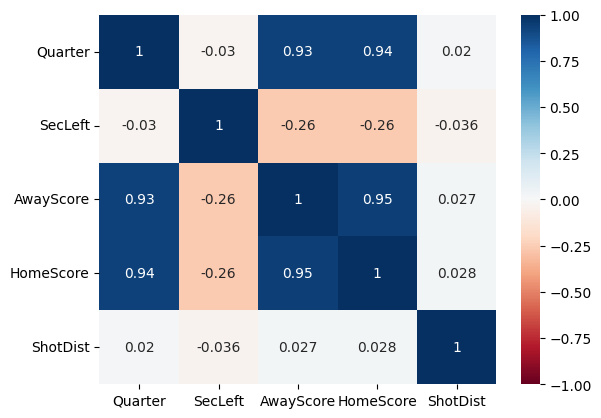

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

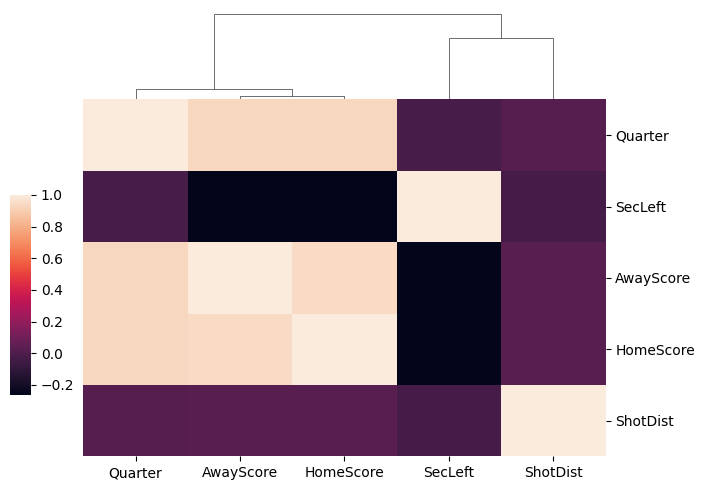

In [ ]:
sns.clustermap(corr, figsize=(7, 5),
    row_cluster=False,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4))